<a href="https://colab.research.google.com/github/lie-42/2025-1-myclass-BDA/blob/main/inclass/SWIMMINGPOOLtitanic_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8_update1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.9 MB/s eta 0:00:00


In [10]:
# 타이타닉 데이터 EDA 전체 코드 (주석 완전 버전)

# 패키지 설치 (Colab 한정)
# !pip install koreanize_matplotlib  # 이미 설치되어 있으므로 생략 가능

# Step 1: 기본 셋업
import pandas as pd            # 데이터프레임 처리용
import numpy as np             # 수치계산용
import seaborn as sns          # 시각화 라이브러리
import matplotlib.pyplot as plt  # 기본 시각화 도구
import koreanize_matplotlib    # 한글 폰트 설정을 쉽게 해주는 패키지

# 시각화 한글 깨짐 방지 (코랩 환경용 설정)
import matplotlib
matplotlib.rc('font', family='NanumGothic')

# Step 0: 타이타닉 단면도 이미지 표시
from IPython.display import Image, display

# 타이타닉 구조 단면도 이미지 출력
display(Image('/mnt/tat.png'))

FileNotFoundError: No such file or directory: '/mnt/tat.png'

FileNotFoundError: No such file or directory: '/mnt/tat.png'

<IPython.core.display.Image object>

In [9]:
# Step 2: CSV 파일 업로드 및 로딩
from google.colab import files
uploaded = files.upload()  # 사용자로부터 파일 직접 업로드 받기

# 업로드한 csv 파일 읽기 (예: titanic1309.csv)
df = pd.read_csv('titanic1309.csv')
df.head()  # 데이터 일부 미리보기



Saving titanic1309.csv to titanic1309.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Step 3: 데이터 구조 및 결측치 확인
df.info()                   # 데이터 타입 및 null 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [24]:
df['Age'].describe() # 통계 정보 확인

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [19]:
df.isnull().sum()          # 변수별 결측치 개수 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [26]:
# Step 4: 결측값 처리

# 나이: 중앙값으로 대체 (연속형 변수)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 객실번호: 'Unknown'으로 대체 (문자형 변수)
df['Cabin'] = df['Cabin'].fillna('Unknown')

# 탑승지: 최빈값(가장 많이 나타난 값)으로 대체
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


df.isnull().sum()          # 변수별 결측치 개수 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


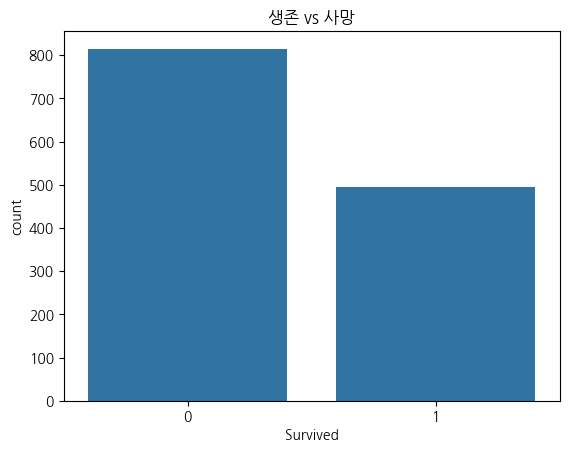

In [27]:
 #Step 5: 변수별 EDA (탐색적 데이터 분석)

# 생존자/사망자 분포 시각화
sns.countplot(x='Survived', data=df)
plt.title('생존 vs 사망')
plt.show()



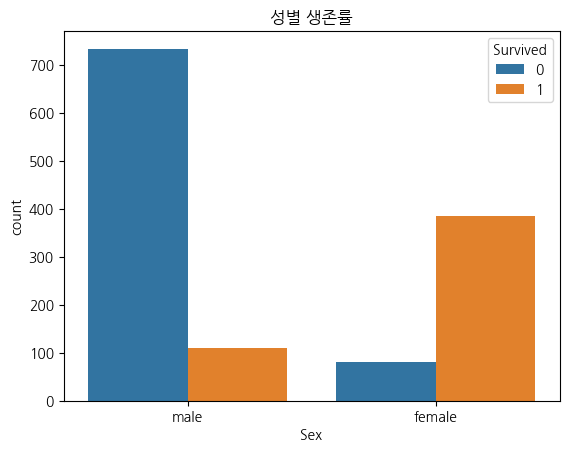

In [28]:
# 성별에 따른 생존률 시각화
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('성별 생존률')
plt.show()


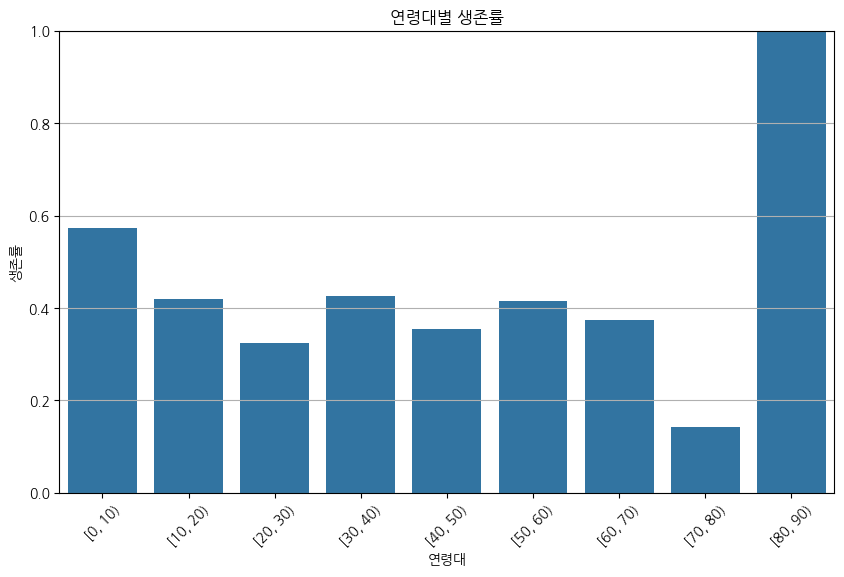

In [30]:
# 연령대를 10살 단위 구간으로 나눔
df['age_group'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80,90], right=False)

# 연령대별 평균 생존률 계산
age_survival = df.groupby('age_group', observed=True)['Survived'].mean().reset_index()

# 연령대별 생존률 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='Survived', data=age_survival)
plt.title('연령대별 생존률')
plt.ylabel('생존률')
plt.xlabel('연령대')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



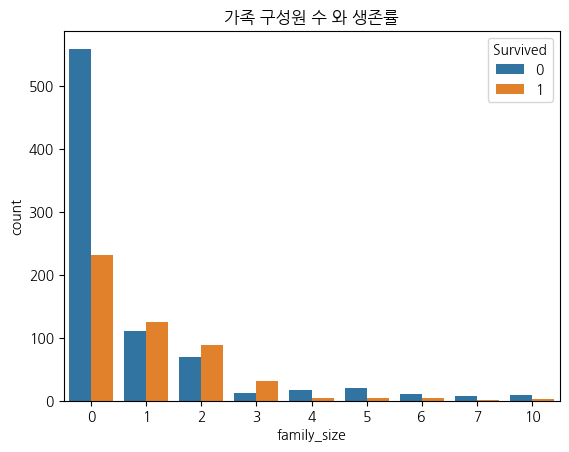

In [32]:
# 가족 구성원 수 변수 생성 (형제/배우자 수 + 부모/자녀 수)
df['family_size'] = df['SibSp'] + df['Parch']

# 가족 구성원 수에 따른 생존률 시각화
sns.countplot(x='family_size', hue='Survived', data=df)
plt.title('가족 구성원 수 와 생존률')
plt.show()


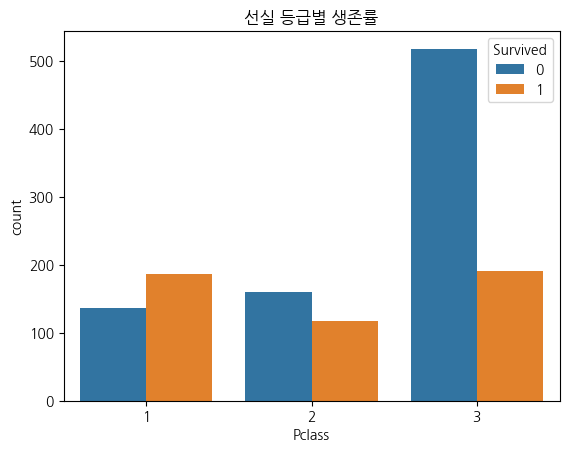

In [33]:
# 선실 등급(Pclass)에 따른 생존률 시각화
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('선실 등급별 생존률')
plt.show()
